Sherry Zhao (txz270)

ECSE484 Fianl project

### Preparation

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
local_zip = '/tmp/airplane_car_ship.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/airplane_car_ship'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_airplanes_dir = os.path.join(train_dir, 'airplanes')
train_cars_dir = os.path.join(train_dir, 'cars')
train_ship_dir = os.path.join(train_dir, 'ship')
validation_airplanes_dir = os.path.join(validation_dir, 'airplanes')
validation_cars_dir = os.path.join(validation_dir, 'cars')
validation_ship_dir = os.path.join(validation_dir, 'ship')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.3,1.5],
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
      train_dir,
      batch_size=32,
      shuffle=True,
      class_mode='categorical',
      target_size=(224, 224))
validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      batch_size=32,
      shuffle=True,
      class_mode='categorical',
      target_size=(224, 224))

Found 3000 images belonging to 3 classes.
Found 582 images belonging to 3 classes.


In [ ]:
def plot_acc_and_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  roc = history.history['auc']
  val_roc = history.history['val_auc']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  
  plt.legend(['train', 'validation'], loc='lower right')

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'orange', label='Validation loss')
  plt.title('Training and validation loss')

  plt.figure()

  plt.plot(epochs, roc, 'b', label='Training ROC')
  plt.plot(epochs, val_roc, 'orange', label='Validation ROC')
  plt.title('Area under ROC curve')

  plt.show()

### ResNet

ResNet50

Epoch 1/80
93/93 [==============================] - 87s 901ms/step - loss: 2.7755 - accuracy: 0.4471 - auc: 0.5924 - val_loss: 0.9198 - val_accuracy: 0.6111 - val_auc: 0.7612
Epoch 2/80
93/93 [==============================] - 81s 875ms/step - loss: 1.0600 - accuracy: 0.5125 - auc: 0.6861 - val_loss: 0.7423 - val_accuracy: 0.6875 - val_auc: 0.8603
Epoch 3/80
93/93 [==============================] - 80s 861ms/step - loss: 0.8569 - accuracy: 0.6044 - auc: 0.7905 - val_loss: 0.7910 - val_accuracy: 0.6545 - val_auc: 0.8284
Epoch 4/80
93/93 [==============================] - 80s 860ms/step - loss: 0.8034 - accuracy: 0.6415 - auc: 0.8216 - val_loss: 0.6557 - val_accuracy: 0.7170 - val_auc: 0.8862
Epoch 5/80
93/93 [==============================] - 80s 864ms/step - loss: 0.7948 - accuracy: 0.6398 - auc: 0.8247 - val_loss: 0.6864 - val_accuracy: 0.6875 - val_auc: 0.8757
Epoch 6/80
93/93 [==============================] - 80s 856ms/step - loss: 0.7935 - accuracy: 0.6361 - auc: 0.8232 - val_loss

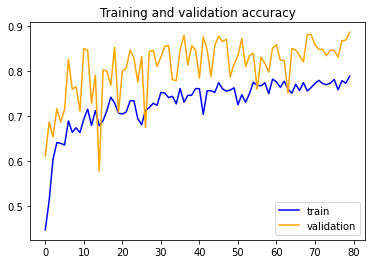

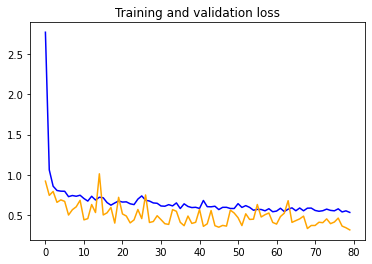

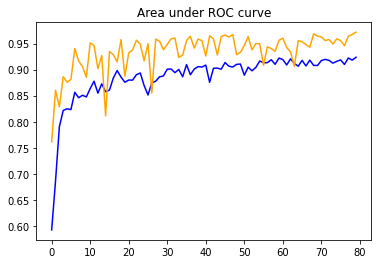

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(weights='imagenet',
              include_top=False,   
              input_shape = (224,224,3),            
              classes=3)

resnet.trainable = False

Resnet50 = tf.keras.models.Sequential([
                     resnet,
                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(256, activation = 'relu'),
                     tf.keras.layers.Dense(3, activation = "softmax")
])

Resnet50.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')])

history = Resnet50.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

ResNet101

Epoch 1/80
93/93 [==============================] - 121s 1s/step - loss: 3.5076 - accuracy: 0.4225 - auc: 0.5975 - val_loss: 1.1342 - val_accuracy: 0.6510 - val_auc: 0.7748
Epoch 2/80
93/93 [==============================] - 105s 1s/step - loss: 1.2694 - accuracy: 0.4929 - auc: 0.6733 - val_loss: 1.5524 - val_accuracy: 0.3819 - val_auc: 0.6890
Epoch 3/80
93/93 [==============================] - 102s 1s/step - loss: 1.1461 - accuracy: 0.5472 - auc: 0.7272 - val_loss: 0.8801 - val_accuracy: 0.6962 - val_auc: 0.8323
Epoch 4/80
93/93 [==============================] - 106s 1s/step - loss: 0.9735 - accuracy: 0.5916 - auc: 0.7685 - val_loss: 0.7790 - val_accuracy: 0.7205 - val_auc: 0.8541
Epoch 5/80
93/93 [==============================] - 103s 1s/step - loss: 0.8702 - accuracy: 0.6260 - auc: 0.7923 - val_loss: 1.0789 - val_accuracy: 0.6250 - val_auc: 0.8021
Epoch 6/80
93/93 [==============================] - 104s 1s/step - loss: 0.8725 - accuracy: 0.6075 - auc: 0.7926 - val_loss: 0.7006 - v

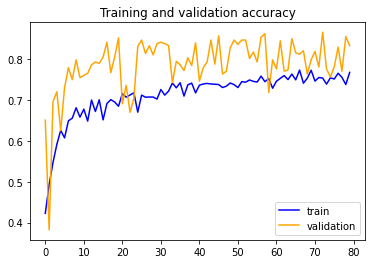

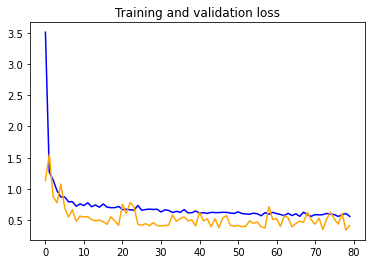

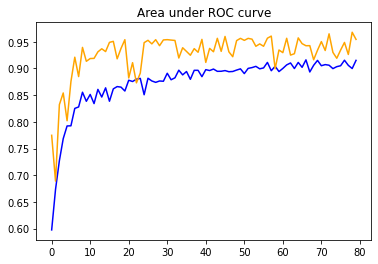

In [ ]:
resnet = tf.keras.applications.resnet.ResNet101(weights='imagenet',
              include_top=False,   
              input_shape = (224,224,3),            
              classes=3)

#for layer in resnet.layers:
resnet.trainable = False

Resnet101 = tf.keras.models.Sequential([
                     resnet,
                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(256, activation = 'relu'),
                     tf.keras.layers.Dense(3, activation = "softmax")
])

Resnet101.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')])

history = Resnet101.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

ResNet152

234708992/234698864 [==============================] - 2s 0us/step
Epoch 1/80
93/93 [==============================] - 121s 1s/step - loss: 3.5974 - accuracy: 0.4225 - auc: 0.5756 - val_loss: 0.9261 - val_accuracy: 0.5503 - val_auc: 0.7650
Epoch 2/80
93/93 [==============================] - 108s 1s/step - loss: 1.0529 - accuracy: 0.5179 - auc: 0.7101 - val_loss: 1.0465 - val_accuracy: 0.5417 - val_auc: 0.7341
Epoch 3/80
93/93 [==============================] - 107s 1s/step - loss: 1.0215 - accuracy: 0.5687 - auc: 0.7435 - val_loss: 0.8351 - val_accuracy: 0.6615 - val_auc: 0.8307
Epoch 4/80
93/93 [==============================] - 108s 1s/step - loss: 0.8668 - accuracy: 0.6159 - auc: 0.7974 - val_loss: 0.8528 - val_accuracy: 0.6094 - val_auc: 0.8163
Epoch 5/80
93/93 [==============================] - 106s 1s/step - loss: 0.8717 - accuracy: 0.6095 - auc: 0.7978 - val_loss: 0.6616 - val_accuracy: 0.7396 - val_auc: 0.8853
Epoch 6/80
93/93 [==============================] - 107s 1s/step - l

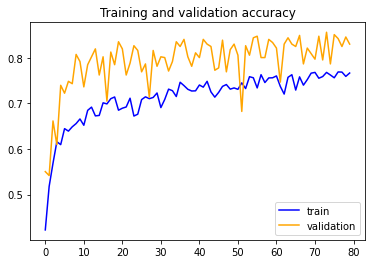

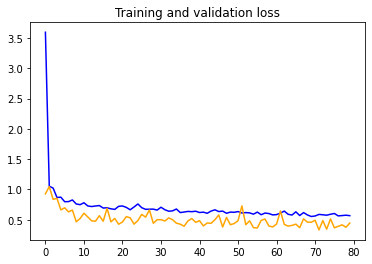

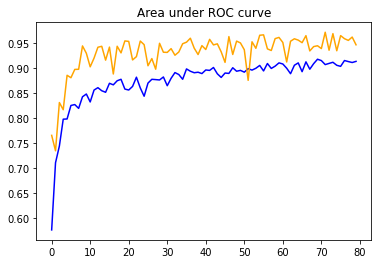

In [ ]:
resnet = tf.keras.applications.resnet.ResNet152(weights='imagenet',
              include_top=False,   
              input_shape = (224,224,3),            
              classes=3)

#for layer in resnet.layers:
resnet.trainable = False

Resnet152 = tf.keras.models.Sequential([
                     resnet,
                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(256, activation = 'relu'),
                     tf.keras.layers.Dense(3, activation = "softmax")
])

Resnet152.compile(optimizer="adam",loss = "categorical_crossentropy", metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')])

history = Resnet152.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

### EfficientNet

24289280/24274472 [==============================] - 0s 0us/step
Epoch 1/80
93/93 [==============================] - 112s 1s/step - loss: 2.0621 - accuracy: 0.3454 - auc: 0.5105 - val_loss: 1.2663 - val_accuracy: 0.5122 - val_auc: 0.6169
Epoch 2/80
93/93 [==============================] - 92s 986ms/step - loss: 1.2984 - accuracy: 0.3376 - auc: 0.5061 - val_loss: 1.5651 - val_accuracy: 0.3420 - val_auc: 0.5419
Epoch 3/80
93/93 [==============================] - 93s 995ms/step - loss: 1.4060 - accuracy: 0.3117 - auc: 0.4854 - val_loss: 1.2254 - val_accuracy: 0.3455 - val_auc: 0.5697
Epoch 4/80
93/93 [==============================] - 92s 985ms/step - loss: 1.2855 - accuracy: 0.3312 - auc: 0.5086 - val_loss: 1.0896 - val_accuracy: 0.5208 - val_auc: 0.6476
Epoch 5/80
93/93 [==============================] - 92s 987ms/step - loss: 1.2813 - accuracy: 0.3437 - auc: 0.5129 - val_loss: 1.1784 - val_accuracy: 0.3403 - val_auc: 0.5714
Epoch 6/80
93/93 [==============================] - 91s 973ms/

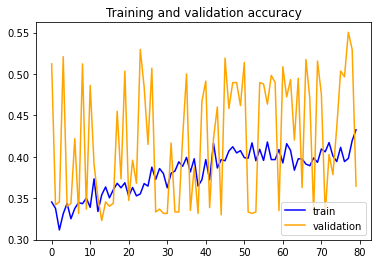

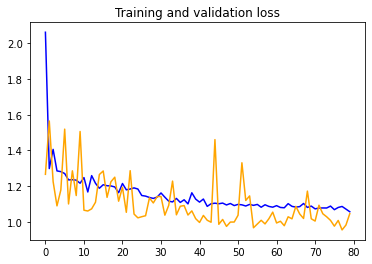

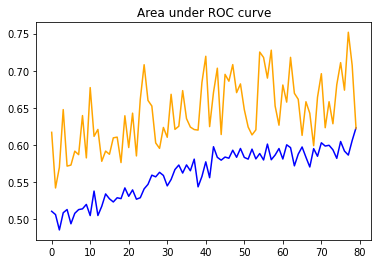

In [ ]:
efficientnetv2b0 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False ,
    weights='imagenet',
    input_shape = (224,224,3), 
    classes=3
)

efficientnetv2b0.trainable = False

model = tf.keras.models.Sequential([
        efficientnetv2b0,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='selu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer="SGD", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')]
)

history = model.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

Epoch 1/80
93/93 [==============================] - 91s 863ms/step - loss: 0.9678 - accuracy: 0.5580 - auc: 0.7434 - val_loss: 0.9205 - val_accuracy: 0.5799 - val_auc: 0.7905
Epoch 2/80
93/93 [==============================] - 78s 842ms/step - loss: 0.8408 - accuracy: 0.6277 - auc: 0.8039 - val_loss: 0.8108 - val_accuracy: 0.6944 - val_auc: 0.8448
Epoch 3/80
93/93 [==============================] - 78s 842ms/step - loss: 0.7803 - accuracy: 0.6557 - auc: 0.8298 - val_loss: 0.7020 - val_accuracy: 0.7101 - val_auc: 0.8813
Epoch 4/80
93/93 [==============================] - 79s 843ms/step - loss: 0.7759 - accuracy: 0.6607 - auc: 0.8338 - val_loss: 0.6108 - val_accuracy: 0.7760 - val_auc: 0.9252
Epoch 5/80
93/93 [==============================] - 78s 840ms/step - loss: 0.7584 - accuracy: 0.6648 - auc: 0.8410 - val_loss: 0.6669 - val_accuracy: 0.7153 - val_auc: 0.8834
Epoch 6/80
93/93 [==============================] - 78s 842ms/step - loss: 0.7499 - accuracy: 0.6782 - auc: 0.8459 - val_loss

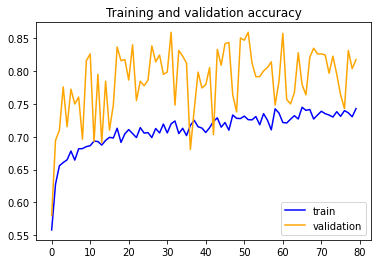

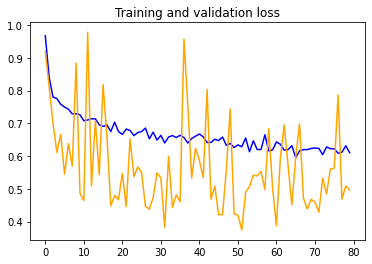

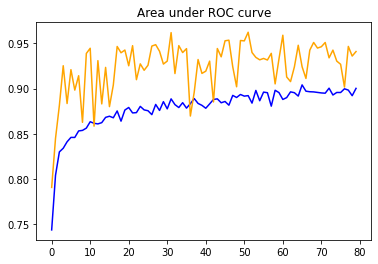

In [ ]:
efficientnetv2s = tf.keras.applications.efficientnet_v2.EfficientNetV2S(
    include_top=False ,
    weights='imagenet',
    input_shape = (224,224,3), 
    classes=3
)

efficientnetv2s.trainable = False

model = tf.keras.models.Sequential([
        efficientnetv2s,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='selu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer="SGD", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')]
)

history = model.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

### Conv2D

Epoch 1/80
93/93 [==============================] - 88s 824ms/step - loss: 0.9245 - accuracy: 0.5610 - auc: 0.7614 - val_loss: 0.6544 - val_accuracy: 0.7778 - val_auc: 0.9011
Epoch 2/80
93/93 [==============================] - 76s 820ms/step - loss: 0.6725 - accuracy: 0.7109 - auc: 0.8781 - val_loss: 0.6673 - val_accuracy: 0.8056 - val_auc: 0.9108
Epoch 3/80
93/93 [==============================] - 76s 821ms/step - loss: 0.5569 - accuracy: 0.7790 - auc: 0.9168 - val_loss: 0.4121 - val_accuracy: 0.8594 - val_auc: 0.9530
Epoch 4/80
93/93 [==============================] - 76s 818ms/step - loss: 0.4776 - accuracy: 0.8231 - auc: 0.9382 - val_loss: 0.2914 - val_accuracy: 0.9062 - val_auc: 0.9751
Epoch 5/80
93/93 [==============================] - 76s 816ms/step - loss: 0.4478 - accuracy: 0.8309 - auc: 0.9455 - val_loss: 0.4345 - val_accuracy: 0.8715 - val_auc: 0.9562
Epoch 6/80
93/93 [==============================] - 75s 810ms/step - loss: 0.4115 - accuracy: 0.8430 - auc: 0.9535 - val_loss

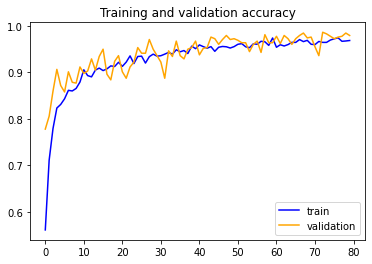

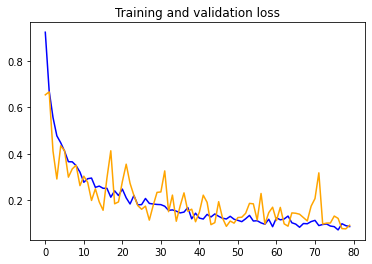

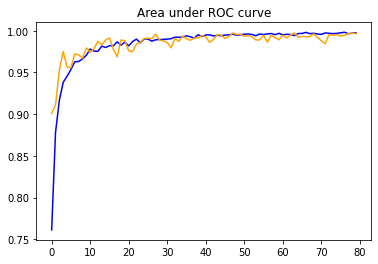

In [ ]:
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
conv_model.compile(
    optimizer="adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')]
)

history = conv_model.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

### Oprimizer

Epoch 1/80
93/93 [==============================] - 91s 971ms/step - loss: 1.0761 - accuracy: 0.4333 - auc: 0.6313 - val_loss: 1.0088 - val_accuracy: 0.6250 - val_auc: 0.8232
Epoch 2/80
93/93 [==============================] - 89s 960ms/step - loss: 1.0034 - accuracy: 0.5051 - auc: 0.7005 - val_loss: 0.9215 - val_accuracy: 0.5260 - val_auc: 0.7452
Epoch 3/80
93/93 [==============================] - 89s 960ms/step - loss: 0.9183 - accuracy: 0.5522 - auc: 0.7524 - val_loss: 0.7701 - val_accuracy: 0.7101 - val_auc: 0.8614
Epoch 4/80
93/93 [==============================] - 89s 954ms/step - loss: 0.8624 - accuracy: 0.6078 - auc: 0.7892 - val_loss: 0.9441 - val_accuracy: 0.5642 - val_auc: 0.7567
Epoch 5/80
93/93 [==============================] - 89s 952ms/step - loss: 0.8352 - accuracy: 0.6294 - auc: 0.8061 - val_loss: 0.6387 - val_accuracy: 0.7535 - val_auc: 0.8974
Epoch 6/80
93/93 [==============================] - 89s 954ms/step - loss: 0.7824 - accuracy: 0.6648 - auc: 0.8342 - val_loss

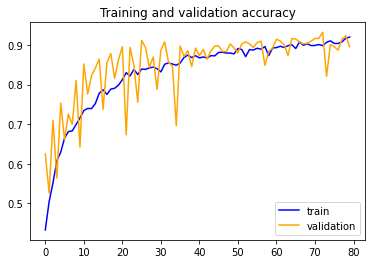

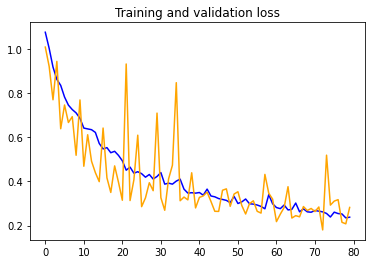

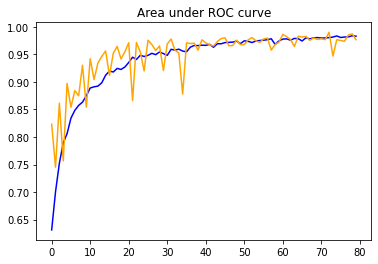

In [ ]:
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
conv_model.compile(
    optimizer="SGD", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')]
)

history = conv_model.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)

Epoch 1/80
93/93 [==============================] - 77s 820ms/step - loss: 0.8846 - accuracy: 0.5694 - auc: 0.7703 - val_loss: 0.7013 - val_accuracy: 0.7708 - val_auc: 0.8866
Epoch 2/80
93/93 [==============================] - 75s 806ms/step - loss: 0.7068 - accuracy: 0.7119 - auc: 0.8678 - val_loss: 0.5513 - val_accuracy: 0.8177 - val_auc: 0.9252
Epoch 3/80
93/93 [==============================] - 74s 794ms/step - loss: 0.6396 - accuracy: 0.7483 - auc: 0.8911 - val_loss: 0.7118 - val_accuracy: 0.7396 - val_auc: 0.8939
Epoch 4/80
93/93 [==============================] - 74s 796ms/step - loss: 0.5459 - accuracy: 0.7891 - auc: 0.9208 - val_loss: 0.8291 - val_accuracy: 0.7274 - val_auc: 0.8946
Epoch 5/80
93/93 [==============================] - 74s 796ms/step - loss: 0.5117 - accuracy: 0.8036 - auc: 0.9300 - val_loss: 0.9016 - val_accuracy: 0.6979 - val_auc: 0.8830
Epoch 6/80
93/93 [==============================] - 75s 802ms/step - loss: 0.4693 - accuracy: 0.8157 - auc: 0.9405 - val_loss

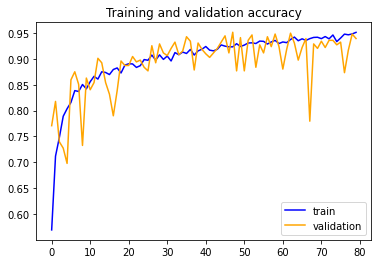

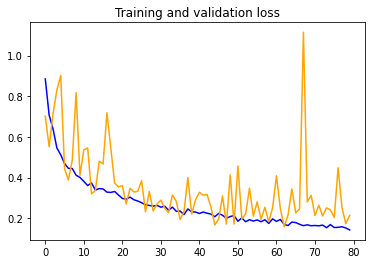

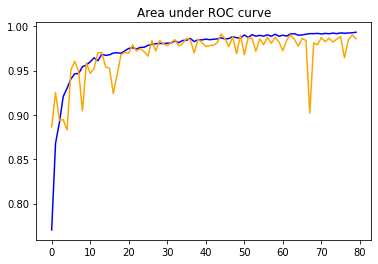

In [ ]:
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
conv_model.compile(
    optimizer=RMSprop(learning_rate=1e-4), 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy", tf.keras.metrics.AUC(name='auc', curve='ROC')]
)

history = conv_model.fit(train_generator, 
                      epochs=80, 
                      steps_per_epoch=train_generator.n // train_generator.batch_size,
                      validation_data=validation_generator, 
                      validation_steps=validation_generator.n // validation_generator.batch_size,
                      verbose=1)

plot_acc_and_loss(history)